### Fase 2: Visualización
Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes cuestiones usando la mejor gráfica que consideres.

In [99]:
#Importo las librerías
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
sys.path.append("../")

#Configuro el DF.
pd.set_option('display.max_columns', None) 

In [102]:
#Abro el csv CLIENTES.
archivo_csv = '/Users/Tania_1/Desktop/ADALAB/MODULO_3/bda-modulo-3-evaluacion-final-TaniaGraff/data/output_data/customer_combined.csv'
df = pd.read_csv(archivo_csv, index_col=0)
df.head()

,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month
Loyalty_Number,,,,,,,,,,,,,,,,,,,,,
100018,2017,Enero,3,0,3,1521,152.0,0.0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8
100018,2017,Febrero,2,2,4,1320,132.0,0.0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8
100018,2018,Octubre,6,4,10,3110,311.0,385.0,31,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8
100018,2017,Abril,4,0,4,924,92.0,0.0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8
100018,2017,Mayo,0,0,0,0,0.0,0.0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8


1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

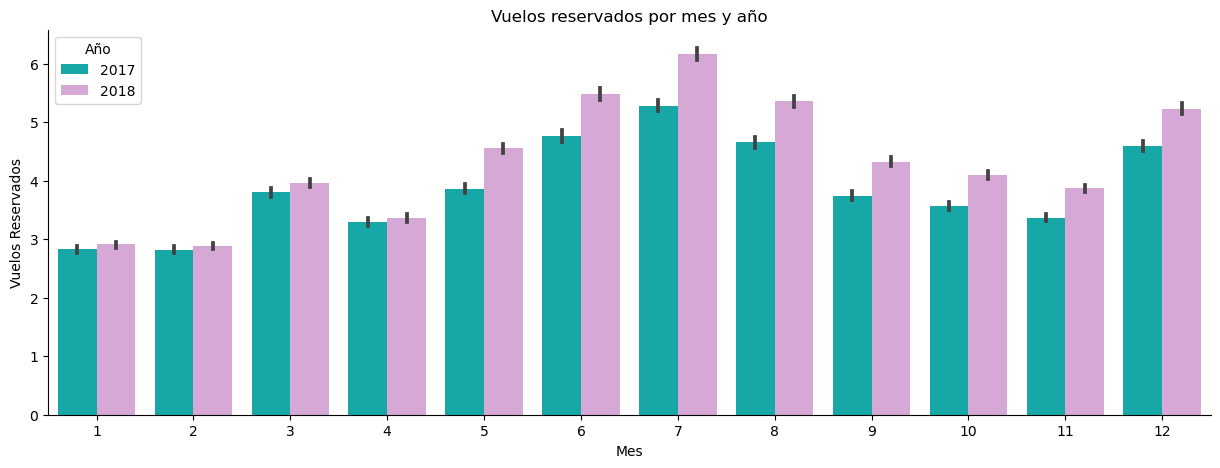

In [84]:
#Como son dos columnas numéricas y una categórica uso un gráfico de barras o barplot.
colores = ['c', 'plum']

plt.figure(figsize=(15, 5))
sns.barplot(x='Month', y='Flights_Booked', hue='Year', data=df, palette=colores)
plt.xlabel('Mes')
plt.ylabel('Vuelos Reservados')
plt.title('Vuelos reservados por mes y año')
plt.legend(title='Año')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);

**Observaciones** La reserva de vuelos parece seguir la misma tendencia en 2017 y 2018, aumentando notablemente durante los meses centrales del año  (junio, julio y agosto) que coinciden con las vacaciones estivales, y a final de año, especialmente durante el mes de diciembre.

2. ¿Existe una relación entre la distancia de los vuelos y lospuntos acumulados por los clientes?

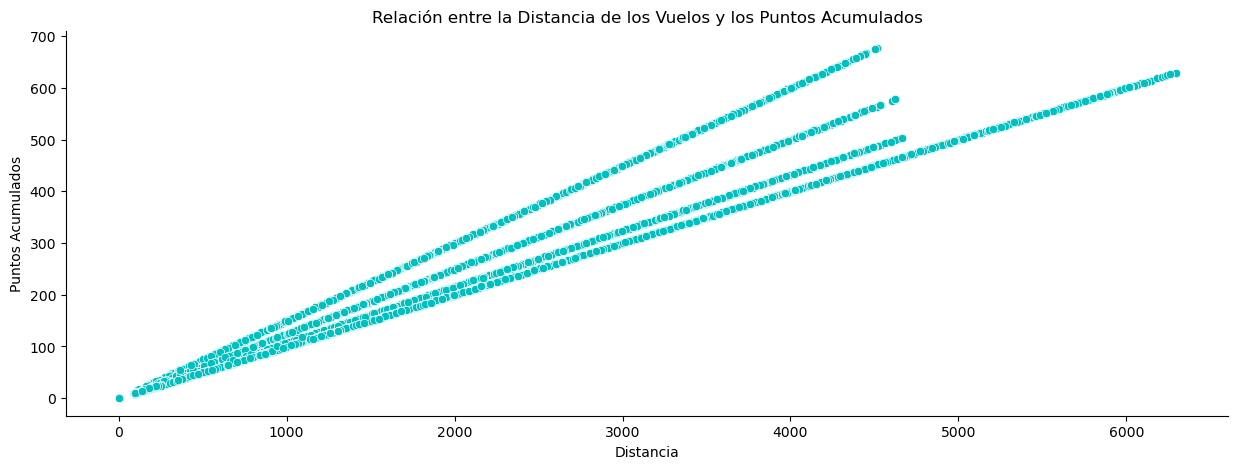

In [98]:
#Como quiero ver si existe una relación entre dos variables numéricas uso un scaterplot.
plt.figure(figsize=(15, 5))
sns.scatterplot(x='Distance', y='Points_Accumulated', data=df, color='c')
plt.xlabel('Distancia')
plt.ylabel('Puntos Acumulados')
plt.title('Relación entre la Distancia de los Vuelos y los Puntos Acumulados')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);

**Observaciones** A medida que aumenta la distancia o millas de vuelo, aumenta la cantidad de puntos acumulados de una forma notablemente significativa, así que podemos deducir que ambas variables están estrechamente relacionadas.

3. ¿Cuál es la distribución de los clientes por provincia o estado?

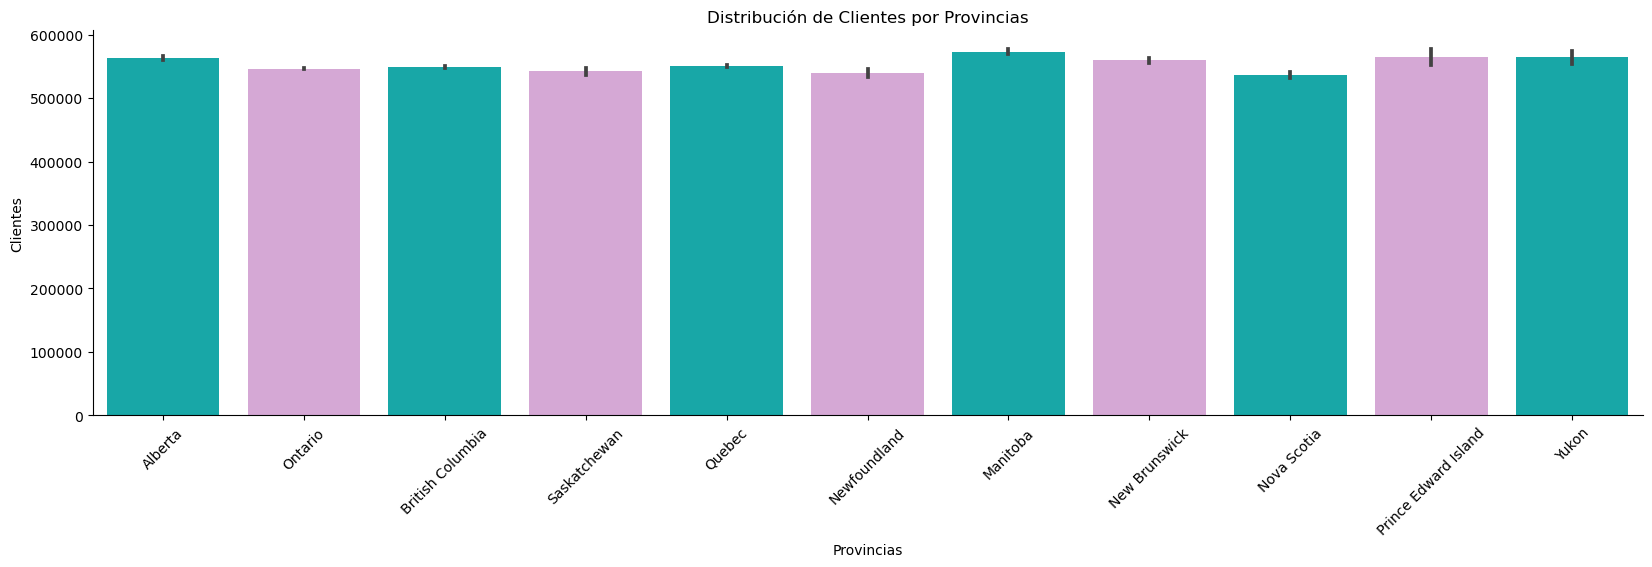

In [87]:
#Vuelvo a usar un barplot para ver la distribución de una variable númerica en función de las categorías o valores únicos de una variable categórica.
colores=['c', 'plum']

plt.figure(figsize=(20, 5))
sns.barplot(x='Province', y='Loyalty_Number', data=df, palette= colores)
plt.xlabel('Provincias')
plt.ylabel('Clientes')
plt.title('Distribución de Clientes por Provincias')
plt.xticks(rotation=45)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);


**Observaciones** La distribución de clientes por provincias parece ser bastante uniforme, sin ninguna provincia que destaque significativamente sobre las demás. Esto sugiere que los clientes de la compañía aérea no se concentran en una región específica, sino que están distribuidos por toda la geografía canadiense. 

4. ¿Cómo se compara el salario promedio entre los diferentesniveles educativos de los clientes?

In [18]:
df.columns

Index(['Loyalty_Number', 'Year', 'Month', 'Flights_Booked',
       'Flights_with_Companions', 'Total_Flights', 'Distance',
       'Points_Accumulated', 'Points_Redeemed', 'Dollar_Cost_Points_Redeemed',
       'Province', 'City', 'Postal_Code', 'Gender', 'Education', 'Salary',
       'Marital_Status', 'Loyalty_Card', 'CLV', 'Enrollment_Type',
       'Enrollment_Year', 'Enrollment_Month'],
      dtype='object')